## Importing Required Packages

In [460]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime



## Import First JSON File from Garmin data dump

First, let's load the data into a list and take a look at it's structure.

In [461]:
# open raw json file as json object and save as a list
path = "../data/marcmehrotra@gmail.com_0_summarizedActivities.json"

with open(path) as summarizedActivities_file:
    summarizedActivities_list = json.load(summarizedActivities_file)

In [462]:
# confirm json file has been sucessfully saved as a list data type
print(type(summarizedActivities_list))

# view length of list
print(len(summarizedActivities_list))

# check data type of list item
print(type(summarizedActivities_list[0]))

# make a dictionary of the 1 and only list item
summarizedActivities_listItem1_dict = dict(summarizedActivities_list[0])

# check length of dict
print(len(summarizedActivities_listItem1_dict))

<class 'list'>
1
<class 'dict'>
1


Looks like there is one list, with only one list item, a dictionary, which also only has one key/value pair.

In [463]:
# try printing just the key
print(summarizedActivities_listItem1_dict.keys())

# getting the data type of the value
print(type(summarizedActivities_listItem1_dict.get('summarizedActivitiesExport')))

# saving the value of the dict as a list
summarizedActivities_subList1 = summarizedActivities_listItem1_dict.get('summarizedActivitiesExport')

# taking a look at the length of the list
print(len(summarizedActivities_subList1))

dict_keys(['summarizedActivitiesExport'])
<class 'list'>
1000


The value in the key/value pair is another list of 1000 items.  Let's take a look at the first list item.

In [464]:
summarizedActivities_subList1[0]

{'activityId': 13719399059,
 'uuidMsb': 5607709462133360387,
 'uuidLsb': -8436957552403133081,
 'name': 'Chapel Hill Trail Running',
 'activityType': 'trail_running',
 'userProfileId': 88467128,
 'timeZoneId': 149,
 'beginTimestamp': 1706537501000,
 'eventTypeId': 9,
 'rule': 'private',
 'sportType': 'RUNNING',
 'startTimeGmt': 1706537501000.0,
 'startTimeLocal': 1706519501000.0,
 'duration': 1553485.9619140625,
 'distance': 470231.982421875,
 'elevationGain': 7694.999998807907,
 'elevationLoss': 7743.000000715256,
 'avgSpeed': 0.30269999504089357,
 'maxSpeed': 0.3704999923706055,
 'avgHr': 140.0,
 'maxHr': 153.0,
 'avgRunCadence': 78.0,
 'maxRunCadence': 83.0,
 'steps': 4058.0,
 'calories': 1307.28624,
 'bmrCalories': 146.6507,
 'startLongitude': -79.07014109194279,
 'startLatitude': 35.93096969649196,
 'aerobicTrainingEffect': 2.9000000953674316,
 'avgStrideLength': 115.52242747701614,
 'avgFractionalCadence': 0.609375,
 'maxFractionalCadence': 0.5,
 'vO2MaxValue': 54.0,
 'elapsedDur

In [465]:
len(summarizedActivities_subList1[0])

70

Looks like anothe dictionary with 70 key/value pairs.  Let's create a dataframe and take a closer look.

In [466]:
# create dataframe from our list
summarizedActivities_df = pd.DataFrame(summarizedActivities_subList1)

print(summarizedActivities_df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 101 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    activityId                      1000 non-null   int64  
 1    uuidMsb                         1000 non-null   int64  
 2    uuidLsb                         1000 non-null   int64  
 3    name                            1000 non-null   object 
 4    activityType                    1000 non-null   object 
 5    userProfileId                   1000 non-null   int64  
 6    timeZoneId                      1000 non-null   int64  
 7    beginTimestamp                  1000 non-null   int64  
 8    eventTypeId                     1000 non-null   int64  
 9    rule                            1000 non-null   object 
 10   sportType                       999 non-null    object 
 11   startTimeGmt                    1000 non-null   float64
 12   startTimeLocal     

### Second Part of "summarizedActivities"

Looks like there is a second file, "marcmehrotra@gmail.com_1001_summarizedActivities.json" - most likely a continuation of the first.  Maybe Garmin will only include up to 1000 activities in one JSON file.

In [467]:
# same procedure as above...
# open raw json file as json object and save as a list
path = "../data/marcmehrotra@gmail.com_1001_summarizedActivities.json"

with open(path) as summarizedActivities2_file:
    summarizedActivities2_list = json.load(summarizedActivities2_file)

In [468]:
# view length of list
print(len(summarizedActivities2_list))

# check data type of list item
print(type(summarizedActivities2_list[0]))

# make a dictionary of the 1 and only list item
summarizedActivities2_listItem1_dict = dict(summarizedActivities2_list[0])

# check length of dict
print(len(summarizedActivities2_listItem1_dict))

1
<class 'dict'>
1


In [469]:
# print key
print(summarizedActivities2_listItem1_dict.keys())

# getting the data type of the value
print(type(summarizedActivities2_listItem1_dict.get('summarizedActivitiesExport')))

# saving the value of the dict as a list
summarizedActivities2_subList1 = summarizedActivities2_listItem1_dict.get('summarizedActivitiesExport')

# taking a look at the length of the new list
print(len(summarizedActivities2_subList1))

dict_keys(['summarizedActivitiesExport'])
<class 'list'>
113


Only 113 more activities.

In [470]:
# creating another dataframe from the second list
summarizedActivities2_df = pd.DataFrame(summarizedActivities2_subList1)
print(summarizedActivities2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   activityId                      113 non-null    int64  
 1   uuidMsb                         113 non-null    int64  
 2   uuidLsb                         113 non-null    int64  
 3   name                            113 non-null    object 
 4   activityType                    113 non-null    object 
 5   userProfileId                   113 non-null    int64  
 6   timeZoneId                      113 non-null    int64  
 7   beginTimestamp                  113 non-null    int64  
 8   eventTypeId                     113 non-null    int64  
 9   rule                            113 non-null    object 
 10  sportType                       113 non-null    object 
 11  startTimeGmt                    113 non-null    float64
 12  startTimeLocal                  113 

### Duplicates and File Comparison

It appears there are fewer columns in this dataframe - 74 vs 101.  Let's compare the keys from both files and see if we can notice what the differences are.

In [471]:
# creating lists from the keys of both dataframes
summarizedActivities_keyList = summarizedActivities_df.keys()
summarizedActivities2_keyList = summarizedActivities2_df.keys()
print(len(summarizedActivities_keyList))
print(len(summarizedActivities2_keyList))

# creating sets of both lists
summarizedActivities_keyList_set = set(summarizedActivities_keyList)
summarizedActivities2_keyList_set = set(summarizedActivities2_keyList)
print(len(summarizedActivities_keyList_set))
print(len(summarizedActivities2_keyList_set))

101
74
101
74


Considering the lengths of the lists and sets are the same, it appears there are no duplicates.  Let's check the differences in the two sets.

In [472]:
print(len(summarizedActivities_keyList_set.intersection(summarizedActivities2_keyList_set)))
print(len(summarizedActivities_keyList_set.difference(summarizedActivities2_keyList_set)))
print(len(summarizedActivities2_keyList_set.difference(summarizedActivities_keyList_set)))
print(len(summarizedActivities_keyList_set.symmetric_difference(summarizedActivities2_keyList_set)))

74
27
0
27


It appears the first dataframe has 27 keys that are not present in the second.

In [473]:
# taking a look at the columns of the first dataframe to identify any unnecessary metrics
for x in summarizedActivities_keyList:
    print(x)

activityId
uuidMsb
uuidLsb
name
activityType
userProfileId
timeZoneId
beginTimestamp
eventTypeId
rule
sportType
startTimeGmt
startTimeLocal
duration
distance
elevationGain
elevationLoss
avgSpeed
maxSpeed
avgHr
maxHr
avgRunCadence
maxRunCadence
steps
calories
bmrCalories
startLongitude
startLatitude
aerobicTrainingEffect
avgStrideLength
avgFractionalCadence
maxFractionalCadence
vO2MaxValue
elapsedDuration
movingDuration
anaerobicTrainingEffect
deviceId
minTemperature
maxTemperature
minElevation
maxElevation
avgDoubleCadence
maxDoubleCadence
locationName
summarizedDiveInfo
maxVerticalSpeed
manufacturer
lapCount
endLongitude
endLatitude
waterEstimated
minRespirationRate
maxRespirationRate
avgRespirationRate
trainingEffectLabel
activityTrainingLoad
aerobicTrainingEffectMessage
anaerobicTrainingEffectMessage
splitSummaries
splits
moderateIntensityMinutes
vigorousIntensityMinutes
decoDive
purposeful
autoCalcCalories
favorite
pr
elevationCorrected
atpActivity
parent
workoutFeel
workoutRpe
lac

Several columns are of no interest, or have nothing to do with biometrics.  Let's create a list of columns to keep.

In [474]:
# create a list of columns to keep
summarizedActivities_columnFilterList = ['name','activityType','sportType','avgSpeed','maxSpeed','avgHr','maxHr','steps','calories','bmrCalories','startLongitude','startLatitude','aerobicTrainingEffect','avgStrideLength','vO2MaxValue','anaerobicTrainingEffect','minTemperature','maxTemperature','minElevation','maxElevation','locationName','endLongitude','endLatitude','minRespirationRate','maxRespirationRate','avgRespirationRate','trainingEffectLabel','activityTrainingLoad','aerobicTrainingEffectMessage','anaerobicTrainingEffectMessage','moderateIntensityMinutes','vigorousIntensityMinutes','pr','lactateThresholdBpm','lactateThresholdSpeed']

# creating a new updated dataframe
summarizedActivities_df_v2 = summarizedActivities_df[summarizedActivities_columnFilterList]
print(summarizedActivities_df_v2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            1000 non-null   object 
 1   activityType                    1000 non-null   object 
 2   sportType                       999 non-null    object 
 3   avgSpeed                        999 non-null    float64
 4   maxSpeed                        840 non-null    float64
 5   avgHr                           1000 non-null   float64
 6   maxHr                           1000 non-null   float64
 7   steps                           936 non-null    float64
 8   calories                        1000 non-null   float64
 9   bmrCalories                     756 non-null    float64
 10  startLongitude                  829 non-null    float64
 11  startLatitude                   829 non-null    float64
 12  aerobicTrainingEffect           100

Went from 101 columns to 35.  Now, are there any columns in the first updated dataframe that are not in the second dataframe?

In [475]:
set(summarizedActivities_columnFilterList).difference(summarizedActivities2_keyList_set)
# apparently, there are three
# we will keep them in for now, and just filter the second dataframe down to the selected columns, minus the three that are not present
summarizedActivities_combined_filter = set(summarizedActivities_columnFilterList).intersection(summarizedActivities2_keyList_set)
len(summarizedActivities_combined_filter)
# a length of 32 makes sense

32

Apparently, there are three.  We will keep them in for now, and just filter the second dataframe down to the selected columns, minus the three that are not present.

In [476]:
# updating the second dataframe with the filter list
summarizedActivities2_df_v2 = summarizedActivities2_df[list(summarizedActivities_combined_filter)]
print(summarizedActivities2_df_v2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   maxElevation                    93 non-null     float64
 1   vO2MaxValue                     23 non-null     float64
 2   avgSpeed                        113 non-null    float64
 3   aerobicTrainingEffectMessage    113 non-null    object 
 4   activityType                    113 non-null    object 
 5   pr                              113 non-null    bool   
 6   sportType                       113 non-null    object 
 7   activityTrainingLoad            113 non-null    float64
 8   name                            113 non-null    object 
 9   minTemperature                  113 non-null    float64
 10  calories                        113 non-null    float64
 11  avgHr                           113 non-null    float64
 12  startLatitude                   93 n

Time to combine the two datasets.

In [477]:
# combining the two dataframes into one
summarizedActivities_df_combined = pd.concat([summarizedActivities_df_v2, summarizedActivities2_df_v2], ignore_index=True)
print(summarizedActivities_df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            1113 non-null   object 
 1   activityType                    1113 non-null   object 
 2   sportType                       1112 non-null   object 
 3   avgSpeed                        1112 non-null   float64
 4   maxSpeed                        933 non-null    float64
 5   avgHr                           1113 non-null   float64
 6   maxHr                           1113 non-null   float64
 7   steps                           1029 non-null   float64
 8   calories                        1113 non-null   float64
 9   bmrCalories                     756 non-null    float64
 10  startLongitude                  922 non-null    float64
 11  startLatitude                   922 non-null    float64
 12  aerobicTrainingEffect           11

In [478]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,:10]

,name,activityType,sportType,avgSpeed,maxSpeed,avgHr,maxHr,steps,calories,bmrCalories
0,Chapel Hill Trail Running,trail_running,RUNNING,0.3027,0.3705,140.0,153.0,4058.0,1307.28624,146.65070
1,Chapel Hill Trail Running,trail_running,RUNNING,0.3397,0.4704,147.0,177.0,5856.0,1986.06948,209.50100
2,Chapel Hill Trail Running,trail_running,RUNNING,0.3186,0.4182,140.0,153.0,3996.0,1319.85630,146.65070
3,Chapel Hill Trail Running,trail_running,RUNNING,0.2824,0.3869,142.0,152.0,10334.0,3272.40562,377.10180
4,Chapel Hill Trail Running,trail_running,RUNNING,0.2818,0.4320,146.0,173.0,7294.0,2338.03116,263.97126
5,Chapel Hill Trail Running,trail_running,RUNNING,0.3075,0.3614,141.0,153.0,4228.0,1378.51658,155.03074
6,Chapel Hill Trail Running,trail_running,RUNNING,0.3055,0.3994,145.0,155.0,3990.0,1349.18644,142.46068
7,Prince William County Running,running,RUNNING,0.2917,0.4180,121.0,131.0,5888.0,1692.76808,213.69102
8,Chapel Hill Trail Running,trail_running,RUNNING,0.2678,0.3313,137.0,158.0,7208.0,2203.95052,272.35130
9,Chapel Hill Trail Running,trail_running,RUNNING,0.3876,0.4462,160.0,173.0,5318.0,1902.26908,180.17086


In [479]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,10:20]

,startLongitude,startLatitude,aerobicTrainingEffect,avgStrideLength,vO2MaxValue,anaerobicTrainingEffect,minTemperature,maxTemperature,minElevation,maxElevation
0,-79.070141,35.930970,2.9,115.522427,54.0,0.0,12.0,25.0,13300.000000,16239.999390
1,-79.070041,35.930896,3.6,127.709137,54.0,2.0,16.0,26.0,14060.000610,17300.000000
2,-79.069991,35.930981,3.1,121.815375,54.0,0.0,24.0,29.0,13939.999390,16519.999695
3,-79.070121,35.930958,3.5,108.465338,54.0,0.0,9.0,25.0,13739.999390,17419.999695
4,-79.070294,35.931018,3.4,107.183491,54.0,2.2,11.0,26.0,13460.000610,16419.999695
5,-79.070081,35.930963,3.0,117.546901,54.0,0.0,10.0,24.0,13739.999390,16719.999695
6,-79.069973,35.931147,3.1,115.758436,54.0,0.0,13.0,27.0,13419.999695,16439.999390
7,-77.478773,38.729285,2.6,111.364685,NaN,0.0,12.0,27.0,7280.000305,8880.000305
8,-79.069976,35.931034,3.1,105.730825,54.0,0.0,15.0,23.0,13600.000000,17400.000000
9,-79.070061,35.930992,4.2,138.897143,54.0,0.0,10.0,24.0,13380.000305,17100.000000


In [480]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,20:30]

,locationName,endLongitude,endLatitude,minRespirationRate,maxRespirationRate,avgRespirationRate,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage
0,Chapel Hill,-79.070134,35.930982,12.79,38.250000,26.160000,AEROBIC_BASE,67.585266,MAINTAINING_AEROBIC_FITNESS_1,NO_ANAEROBIC_BENEFIT_0
1,Chapel Hill,-79.070037,35.930847,11.62,44.400002,29.389999,TEMPO,152.824707,IMPROVING_AEROBIC_FITNESS_2,MAINTAINING_ANAEROBIC_BASE_1
2,Chapel Hill,-79.070050,35.931066,14.17,38.869999,29.440001,AEROBIC_BASE,76.669128,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0
3,Chapel Hill,-79.069884,35.930858,11.26,39.869999,25.559999,AEROBIC_BASE,119.272537,IMPROVING_AEROBIC_ENDURANCE_9,NO_ANAEROBIC_BENEFIT_0
4,Chapel Hill,-79.069908,35.930955,12.71,44.180000,29.230000,TEMPO,146.828323,IMPROVING_AEROBIC_FITNESS_2,MAINTAINING_ANAEROBIC_POWER_7
5,Chapel Hill,-79.070126,35.931010,16.23,37.610001,25.540001,AEROBIC_BASE,69.379669,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0
6,Chapel Hill,-79.070073,35.931071,15.83,38.900002,30.200001,AEROBIC_BASE,82.958618,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0
7,Prince William County,-77.478729,38.729215,20.67,38.040001,32.459999,AEROBIC_BASE,53.401215,MAINTAINING_AEROBIC_BASE_7,NO_ANAEROBIC_BENEFIT_0
8,Chapel Hill,-79.070018,35.931260,NaN,NaN,NaN,AEROBIC_BASE,82.543167,IMPROVING_AEROBIC_BASE_8,NO_ANAEROBIC_BENEFIT_0
9,Chapel Hill,-79.070110,35.931051,18.90,47.709999,36.230000,VO2MAX,176.525803,HIGHLY_IMPROVING_VO2_MAX_16,NO_ANAEROBIC_BENEFIT_0


In [481]:
# taking a look at the first 10 activities
summarizedActivities_df_combined.iloc[:10,30:]

,moderateIntensityMinutes,vigorousIntensityMinutes,pr,lactateThresholdBpm,lactateThresholdSpeed
0,0.0,23.0,False,NaN,NaN
1,1.0,35.0,False,NaN,NaN
2,0.0,23.0,False,NaN,NaN
3,0.0,65.0,False,NaN,NaN
4,0.0,46.0,False,NaN,NaN
5,0.0,25.0,False,NaN,NaN
6,0.0,24.0,False,NaN,NaN
7,1.0,36.0,False,NaN,NaN
8,3.0,44.0,False,NaN,NaN
9,0.0,31.0,False,NaN,NaN


### Missing Values

Let's take a look at the missing value count.

In [482]:
summarizedActivities_missing = pd.DataFrame({'count': summarizedActivities_df_combined.isnull().sum(), '%': 100 * summarizedActivities_df_combined.isnull().mean()})
summarizedActivities_missing[summarizedActivities_missing['count'] != 0].sort_values('count', ascending=False)

,count,%
lactateThresholdSpeed,1087,97.663971
lactateThresholdBpm,1084,97.394429
bmrCalories,357,32.075472
vO2MaxValue,348,31.266846
vigorousIntensityMinutes,289,25.965858
moderateIntensityMinutes,289,25.965858
avgStrideLength,218,19.586703
locationName,196,17.610063
endLongitude,192,17.250674
endLatitude,192,17.250674


There are several columns with a high percentage of missing values.

Our target feature is `aerobic training effect`, and we can see there are no missing values there, so that is good.

Two features have a very high number of missing values - `lactateThresholdSpeed` and `lactateThresholdBpm`.  Normally we would be justified in droping these columns, but I believe the Garmin device only records this data when it measures a **change**, so for the activities that have no value, the value may simply be the same as it was the last time the device recorded a value.  In this case, we can forward fill the values, as long as the data is ordered by date.  But let's leave it as is for now.

### Distibution of Feature Values

Let's take a look at the distributions of features to see if they look reasonable or if there are any clear outliers.

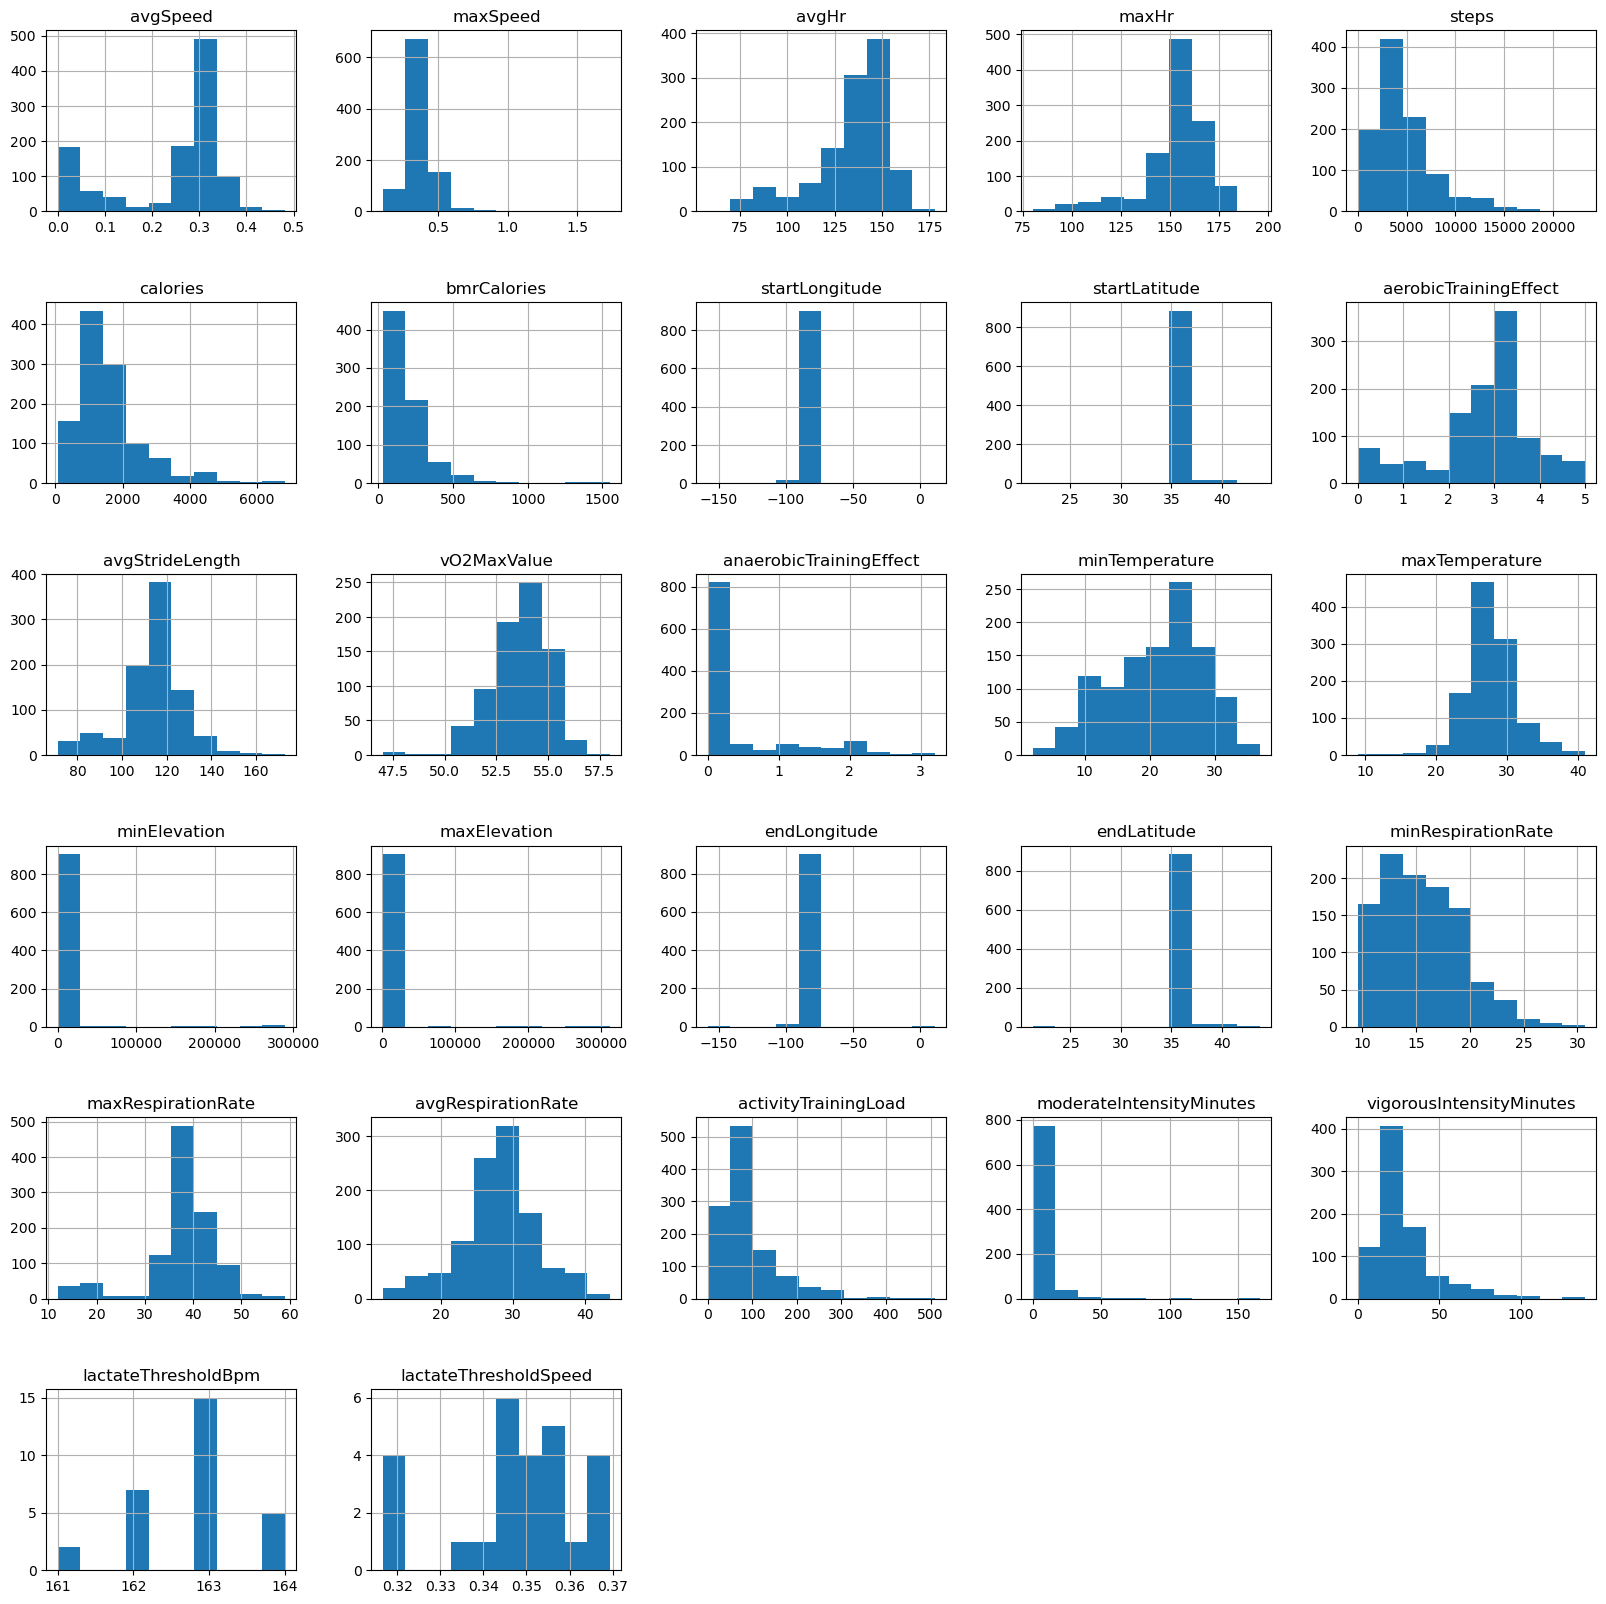

In [484]:
summarizedActivities_df_combined.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5);

Possible areas of concern:
- `max speed` - this looks clustered near the low end.  Need to check for outliers on the right.  Also, maybe a job for later, but **speed** for a running activity may be better represented by minutes per mile, or **pace**.  I'm not even sure what unit of measure this is.  We can look at that conversion later.
- `avgHR` and `maxHR` seem slightly heavy on the high end.  This seems reasonable considering there is a mix of activities that includes walking, hiking, etc., but we could take a quick look at the very low end.
- `steps` looks right skewed, as does `calories` and `bmrCalories`, but this makes sense.
- the values for `startLongitude` and `startLatitude` appear quite similar, but this is ok as it simply represents a location and some runs were done away from home.  Same for `endLongitude` and 'endLatitude`.
- Our target feature, `aerobicTraningEffect` looks fairly normal, same with `vO2MaxValue` and `maxRespiraionRate`.
- Although `anaerobicTrainingEffect` is strongly right skewed, this is normal since most activities are not anaerobic.
- `minElevation` and `maxElevation` - similar to the location based features.  Some runs were done in Colorado, so the min and max elevations are understandably quite different.
- `minRespirationRate` looks reasonable, even though it's a little right skewed, but this may be normal.
`activityTrainingLoad` and `vigorousIntensityMinutes` are definately clustered on the left, but again, this is probably normal considering most activities were lower intensity.
- `moderateIntensityMinutes` is almost all on the left, possibly because running activitites are not typically classified as **moderate**, and the majority of the activities are **running** activities.

Let's start with `maxSpeed'.

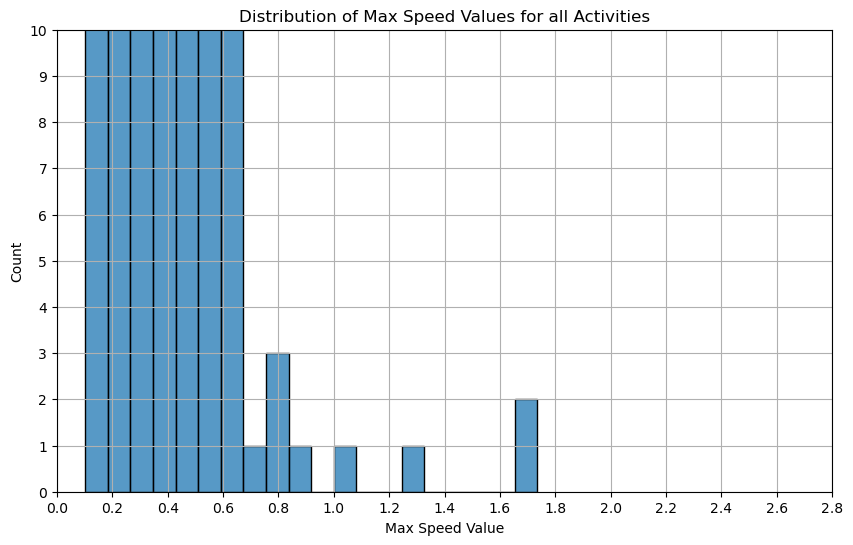

In [485]:
plt.figure(figsize=(10, 6))
sns.histplot(data=summarizedActivities_df_combined, x='maxSpeed', bins=20)
plt.title('Distribution of Max Speed Values for all Activities')
plt.xlabel('Max Speed Value')
plt.ylabel('Count')
plt.ylim(0, 10)
plt.xticks(np.arange(0, 3, .2))
plt.yticks(np.arange(0, 11, 1))
plt.grid(True)
plt.show()

Looks like there are a few outliers.  Let's take a closer look at the data.

In [486]:
keyFeatures = ['name','maxSpeed','maxHr','maxRespirationRate','activityTrainingLoad','anaerobicTrainingEffect','anaerobicTrainingEffectMessage']
summarizedActivities_df_combined[keyFeatures][summarizedActivities_df_combined.maxSpeed > .9]

,name,maxSpeed,maxHr,maxRespirationRate,activityTrainingLoad,anaerobicTrainingEffect,anaerobicTrainingEffectMessage
639,Chapel Hill Trail Running,1.2618,154.0,36.099998,78.033096,0.0,NO_ANAEROBIC_BENEFIT_0
902,Sprint Intervals at McDougal,1.0301,172.0,41.740002,153.679794,3.0,IMPROVING_ANAEROBIC_CAPACITY_AND_SPEED_12
991,Chapel Hill Running,1.7346,127.0,17.510000,8.578049,0.0,NO_ANAEROBIC_BENEFIT_0
1073,Chapel Hill Trail Running,1.7140,171.0,45.090000,194.265579,0.5,NO_ANAEROBIC_BENEFIT_0


Luckily, I remember activity 902, labeled "Sprint Intervals at McDougal."  It was painful, but a good marker for the upper limit of `maxSpeed`!  Being an all out sprint on a track, I can't imagine any other activity logging a maximum speed above that.  This raises concern for the other activities:
- 639 - I could never go as fast on a trail as I did on the track that day, so a max speed of 1.26 doesn't seem correct.
- 991 - Not likely, especially with a max heart rate of only 127 and hardly any activity load.  
- 1073 - Again, not likely.  Max heart rate is more believable at 171 and the activity training load close to 200, but with hardly any anaerobic effect and a speed way higher than "Spring Intervals at McDougal," I don't think this one is accurate.

Dropping the three in question.

In [487]:
i = [639, 991, 1073]
summarizedActivities_df_combined.drop(i, inplace=True)

Let's take a look at the next couple coulumns.

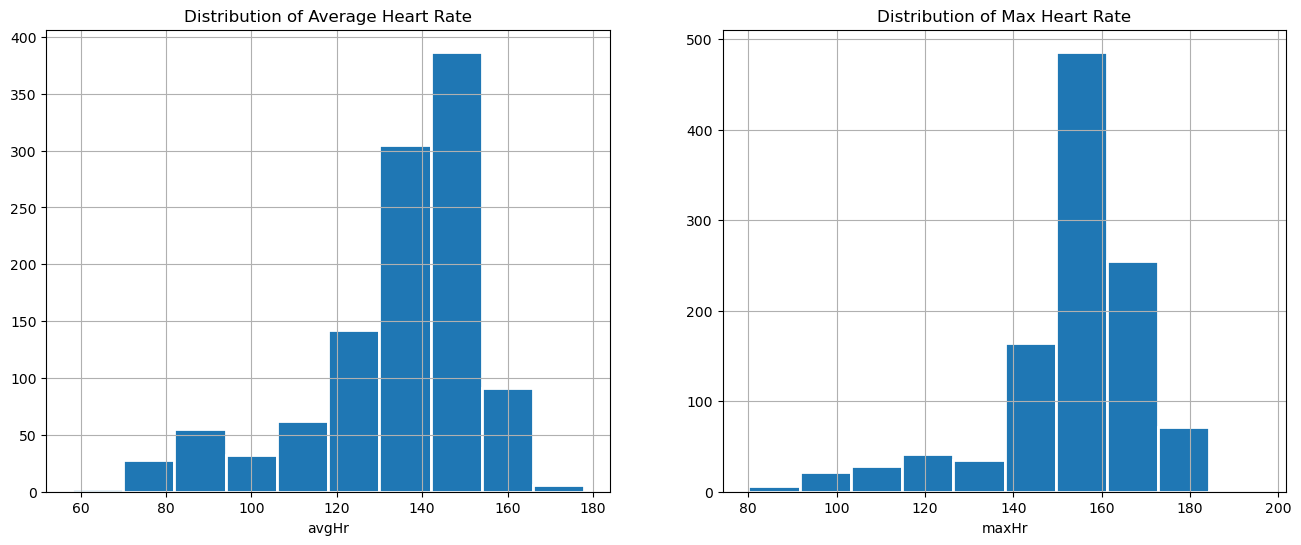

In [488]:
#Create two subplots on 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

summarizedActivities_df_combined.avgHr.hist(ax=ax[0], edgecolor='white', linewidth=2)
ax[0].set_title('Distribution of Average Heart Rate')
ax[0].set_xlabel('avgHr')

summarizedActivities_df_combined.maxHr.hist(ax=ax[1], edgecolor='white', linewidth=2)
ax[1].set_title('Distribution of Max Heart Rate')
ax[1].set_xlabel('maxHr');

Let's take a look at the details of the activities on the very low end, starting with `avgHr`.

In [489]:
print(summarizedActivities_df_combined.avgHr[summarizedActivities_df_combined['avgHr'] < 75].count())
print(summarizedActivities_df_combined.avgHr[summarizedActivities_df_combined['avgHr'] < 75])

9
66      73.000000
235     70.000000
390     67.000000
655     73.000000
810     72.000000
850     58.000000
1022    70.000000
1068    71.399158
1074    73.000000
Name: avgHr, dtype: float64


In [490]:
summarizedActivities_df_combined[summarizedActivities_df_combined['avgHr'] < 75]

,name,activityType,sportType,avgSpeed,maxSpeed,avgHr,maxHr,steps,calories,bmrCalories,...,avgRespirationRate,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes,pr,lactateThresholdBpm,lactateThresholdSpeed
66,Orange County Track Me,other,GENERIC,0.070300,0.2557,73.000000,93.0,NaN,645.26308,360.34172,...,NaN,UNKNOWN,1.495209,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN
235,Durham Walking,walking,STEPS,0.042100,0.1642,70.000000,96.0,3564.0,1152.25550,603.36288,...,NaN,UNKNOWN,1.976959,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,9.0,0.0,False,NaN,NaN
390,Alleghany County Hiking,hiking,HIKING,0.065700,0.2827,67.000000,115.0,15462.0,2208.14054,1533.54732,...,NaN,UNKNOWN,3.800873,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,16.0,0.0,False,NaN,NaN
655,Orange County Walking,walking,STEPS,0.063300,0.1553,73.000000,99.0,4180.0,976.27466,444.14212,...,16.790001,UNKNOWN,2.311844,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,5.0,0.0,False,NaN,NaN
810,Chapel Hill Hiking,hiking,HIKING,0.087400,0.1633,72.000000,98.0,7616.0,951.13454,NaN,...,16.570000,UNKNOWN,1.631363,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,1.0,0.0,False,NaN,NaN
850,Yoga,yoga,TRAINING,NaN,NaN,58.000000,80.0,0.0,92.18044,NaN,...,15.010000,UNKNOWN,0.000000,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN
1022,Chapel Hill Walking,walking,GENERIC,0.098900,0.2351,70.000000,95.0,2842.0,620.12296,NaN,...,18.840000,UNKNOWN,4.803833,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN
1068,Visit to the Museum of Life and Science,walking,GENERIC,0.030578,0.1512,71.399158,93.0,NaN,1596.39762,NaN,...,18.420000,UNKNOWN,2.647293,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN
1074,Durham County Hiking,hiking,GENERIC,0.075600,0.2323,73.000000,108.0,6310.0,1349.18644,NaN,...,13.080000,UNKNOWN,2.968018,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,NaN,NaN,False,NaN,NaN


In [491]:
summarizedActivities_df_combined.columns
keyFeatures = ['name','steps','aerobicTrainingEffect','anaerobicTrainingEffect','avgHr','maxHr']
summarizedActivities_df_combined[keyFeatures][summarizedActivities_df_combined['avgHr'] < 75]

,name,steps,aerobicTrainingEffect,anaerobicTrainingEffect,avgHr,maxHr
66,Orange County Track Me,NaN,0.1,0.0,73.000000,93.0
235,Durham Walking,3564.0,0.1,0.0,70.000000,96.0
390,Alleghany County Hiking,15462.0,0.3,0.0,67.000000,115.0
655,Orange County Walking,4180.0,0.1,0.0,73.000000,99.0
810,Chapel Hill Hiking,7616.0,0.1,0.0,72.000000,98.0
850,Yoga,0.0,0.0,0.0,58.000000,80.0
1022,Chapel Hill Walking,2842.0,0.3,0.0,70.000000,95.0
1068,Visit to the Museum of Life and Science,NaN,0.2,0.0,71.399158,93.0
1074,Durham County Hiking,6310.0,0.2,0.0,73.000000,108.0


These are on the low end as for as average heart rate, but they do not look like errors. I'm going to assume the case is the same for maxHR - some activities on the low end, but no errors.

### Hierarchy of Activities

It is possible that Garmin records different metrics for different activities.  Let's take a look at the breakdown of how many of each activity type we have.  Unfortunately, we have two different activity columns: `activityType` and `sportType`.

In [715]:
summarizedActivities_activityType_vc = pd.DataFrame({'activityType': summarizedActivities_df_combined['activityType'].value_counts(),
                                                    '%': summarizedActivities_df_combined['activityType'].value_counts()/len(summarizedActivities_df_combined) * 100})

summarizedActivities_activityType_vc

,activityType,%
trail_running,676,60.900901
strength_training,135,12.162162
running,118,10.630631
walking,58,5.225225
indoor_rowing,36,3.243243
hiking,31,2.792793
other,27,2.432432
treadmill_running,9,0.810811
indoor_cardio,8,0.720721
cycling,7,0.630631


In [723]:
activityList = [activity for activity in summarizedActivities_df_combined['activityType'].unique() \
                if summarizedActivities_df_combined.loc[summarizedActivities_df_combined['activityType'] == activity,'activityType'].value_counts().sum() > 100]

summarizedActivities_topActivities = summarizedActivities_df_combined[summarizedActivities_df_combined['activityType'].isin(activityList)]

In [697]:
summarizedActivities_sportType_vc = pd.DataFrame({'sportType': summarizedActivities_df_combined['sportType'].value_counts(),
                                                    '%': summarizedActivities_df_combined['sportType'].value_counts()/len(summarizedActivities_df_combined) * 100})

summarizedActivities_sportType_vc

,sportType,%
RUNNING,775,69.819820
GENERIC,102,9.189189
TRAINING,84,7.567568
FITNESS_EQUIPMENT,63,5.675676
STEPS,32,2.882883
HIKING,25,2.252252
ROWING,15,1.351351
CYCLING,7,0.630631
INVALID,4,0.360360
SWIMMING,2,0.180180


In [714]:
for activity in activityList:
    print(f"{activity}:\n{summarizedActivities_topActivities.loc[summarizedActivities_topActivities['activityType'] == activity,'sportType'].value_counts()}\n")


trail_running:
RUNNING    648
GENERIC     28
Name: sportType, dtype: int64

running:
RUNNING    118
Name: sportType, dtype: int64

strength_training:
TRAINING             79
FITNESS_EQUIPMENT    38
GENERIC              18
Name: sportType, dtype: int64



Create data density series for each of the combinations

In [739]:
summarizedActivities_trailRunning = summarizedActivities_topActivities.loc[(summarizedActivities_topActivities['activityType'] == 'trail_running') &\
                                    (summarizedActivities_topActivities['sportType'] == 'RUNNING')]
# summarizedActivities_trailrunning_RUNNING = summarizedActivities_trailRunning.notna().mean()

In [750]:
summarizedActivities_trailRunning.isna().melt(value_name='missing')

,variable,missing
0,name,False
1,name,False
2,name,False
3,name,False
4,name,False
...,...,...
22675,lactateThresholdSpeed,True
22676,lactateThresholdSpeed,True
22677,lactateThresholdSpeed,True
22678,lactateThresholdSpeed,True


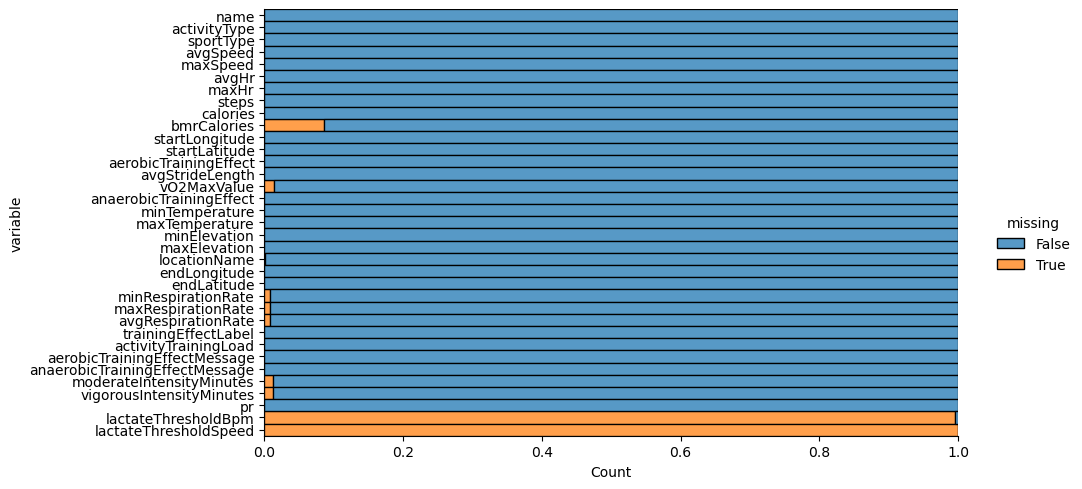

In [752]:
sns.displot(
    data=summarizedActivities_trailRunning.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=2
)

# Import Second JSON File - "88467128_userBioMetrics.json"

In [492]:
with open("../data/88467128_userBioMetrics.json") as userBioMetrics_file:
    userBio_df = pd.read_json(userBioMetrics_file)

In [493]:
userBio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   version                              800 non-null    int64  
 1   metaData                             800 non-null    object 
 2   userSetNullForHeight                 800 non-null    bool   
 3   userSetNullForWeight                 800 non-null    bool   
 4   userSetNullForActivityClass          800 non-null    bool   
 5   userSetNullForLactateThresholdSpeed  800 non-null    bool   
 6   userSetNullForLactateThresholdHR     800 non-null    bool   
 7   userSetNullForVO2MaxCycling          800 non-null    bool   
 8   userSetNullForVO2MaxRunning          800 non-null    bool   
 9   height                               27 non-null     float64
 10  weight                               11 non-null     object 
 11  vo2MaxRunning                   

In [494]:
userBio_df['userSetNullForHeight'].value_counts()
# userBio_df[['userSetNullForHeight','height','userSetNullForWeight','weight']].iloc[750:800]


False    799
True       1
Name: userSetNullForHeight, dtype: int64

In [495]:
userBio_df.head(15)

,version,metaData,userSetNullForHeight,userSetNullForWeight,userSetNullForActivityClass,userSetNullForLactateThresholdSpeed,userSetNullForLactateThresholdHR,userSetNullForVO2MaxCycling,userSetNullForVO2MaxRunning,height,weight,vo2MaxRunning,lactateThresholdSpeed,lactateThresholdHearRate,firstbeatRunningLtTimestamp,thresholdHeartRateAutoDetected,activityClass,sportId,functionalThresholdPower
0,1598395611521,"{'userProfilePK': 88467128, 'calendarDate': '2...",True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1598395686926,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,182.880005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1598395686946,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,"{'weight': 72574.0, 'sourceType': 'USER_SETTIN...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1598458352012,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1598612573269,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1598871645728,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1598871637324,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,NaN,0.319400,162.0,NaN,NaN,NaN,NaN,NaN
7,1598871647336,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,True,False,False,True,False,182.880005,NaN,48.0,0.319444,162.0,967805859.0,1.0,NaN,NaN,NaN
8,1599059312695,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1599043179591,"{'userProfilePK': 88467128, 'calendarDate': '2...",False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN


There seems to be a couple dictionaries as values under `metaData` and `weight`.  Let's take a closer look.

In [496]:
for key, value in userBio_df['metaData'].iloc[0].items():
    print(f"{key}: {value}") 

for key, value in userBio_df['weight'].iloc[2].items():
    print(f"{key}: {value}") 

print(type(userBio_df['metaData'].at[0].get('calendarDate')))
print(type(userBio_df['weight'].at[2].get('weight')))

userProfilePK: 88467128
calendarDate: 2020-08-25T18:46:51.490
sequence: 1598395611521
weight: 72574.0
sourceType: USER_SETTING
timestampGMT: 2020-08-25T22:48:06.896
<class 'str'>
<class 'float'>


So of the above information, `calendarDate` and `weight` may be useful.  Let's add those as columns to the dataframe.  Since the column we are extracting the weight from is named `weight`, let's make a copy appended with "_old" before we overwrite the original data with the actual weight.

In [497]:
date_format = '%Y-%m-%dT%H:%M:%S.%f'

userBio_df['Date'] = pd.Series(dtype='datetime64[ns]')
for activity in range(len(userBio_df)):
    userBio_df['Date'].at[activity] = datetime.strptime(userBio_df['metaData'].at[activity].get('calendarDate'), date_format)

userBio_df['weight_old'] = userBio_df['weight'].copy()

for activity in range(len(userBio_df)):
    if str(userBio_df['weight'].loc[activity]) != 'nan':
        userBio_df['weight'].at[activity] = userBio_df['weight'].at[activity].get('weight')


Many of these columns appear irrelevant.  Creating a new dataframe with only the features of interest.

In [498]:
userBio_featureList = ['Date','height','weight','vo2MaxRunning', 'thresholdHeartRateAutoDetected','lactateThresholdHearRate','lactateThresholdSpeed']
userBio = userBio_df[userBio_featureList]

In [499]:
# useful code for inserting a pandas series at a particular location
# userBio.insert(0, 'date', userBio_dateList)

Let's take a look at the new dataframe

In [500]:
userBio.iloc[:20,:]

,Date,height,weight,vo2MaxRunning,thresholdHeartRateAutoDetected,lactateThresholdHearRate,lactateThresholdSpeed
0,2020-08-25 18:46:51.490,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-25 18:48:06.896,182.880005,NaN,NaN,NaN,NaN,NaN
2,2020-08-25 18:48:06.896,NaN,72574.0,NaN,NaN,NaN,NaN
3,2020-08-26 00:00:00.000,NaN,NaN,48.0,NaN,NaN,NaN
4,2020-08-28 00:00:00.000,NaN,NaN,48.0,NaN,NaN,NaN
5,2020-08-31 00:00:00.000,NaN,NaN,48.0,NaN,NaN,NaN
6,2020-08-31 06:56:52.000,NaN,NaN,NaN,NaN,162.0,0.319400
7,2020-08-31 07:00:47.308,182.880005,NaN,48.0,1.0,162.0,0.319444
8,2020-09-02 00:00:00.000,NaN,NaN,48.0,NaN,NaN,NaN
9,2020-09-02 06:39:39.559,NaN,NaN,NaN,NaN,NaN,NaN


Many values are missing, however there is a pattern here between `thresholdHeartRateAutoDetected` and `lactateThresholdSpeed`, so we will keep these values as they are and explore more in EDA.

Taking a look at the trend over time for `lactateThresholdHearRate`, `lactateThresholdSpeed` and `vo2MaxRunning`

''

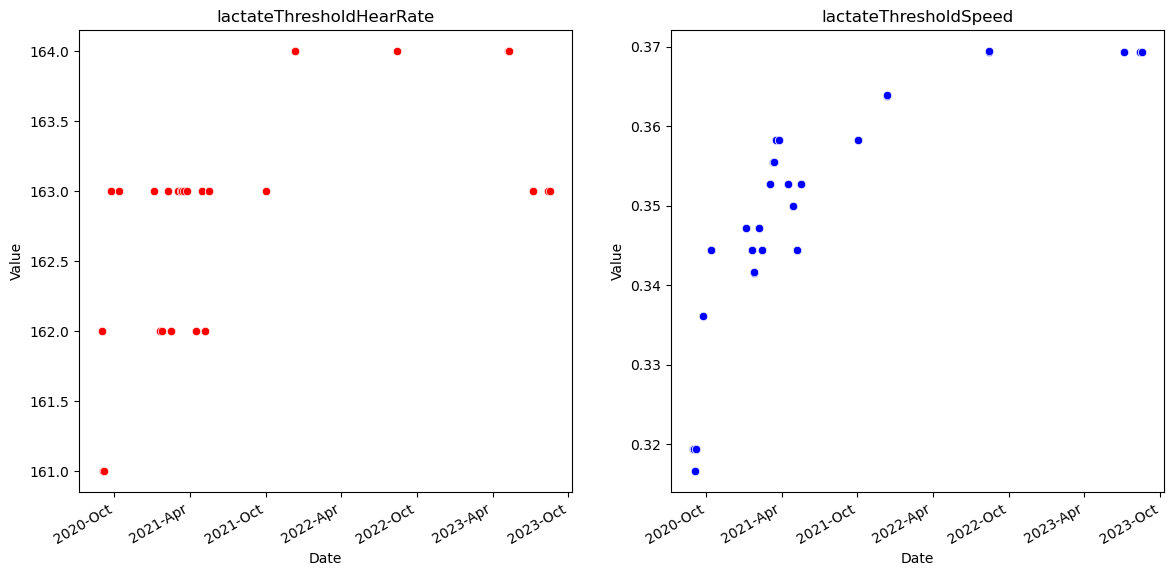

In [501]:
fig, ax = plt.subplots(1, 2, figsize =(14,6))

sns.scatterplot(ax=ax[0], x=userBio['Date'], y=userBio['lactateThresholdHearRate'], color='red')
ax[0].set_title('lactateThresholdHearRate')
ax[0].set(ylabel='Value')
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax[0].get_xticklabels():
    label.set(rotation=30, horizontalalignment='right')

sns.scatterplot(ax=ax[1], x=userBio['Date'], y=userBio['lactateThresholdSpeed'], color='blue')
ax[1].set_title('lactateThresholdSpeed')
ax[1].set(ylabel='Value')
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax[1].get_xticklabels():
    label.set(rotation=30, horizontalalignment='right')
;


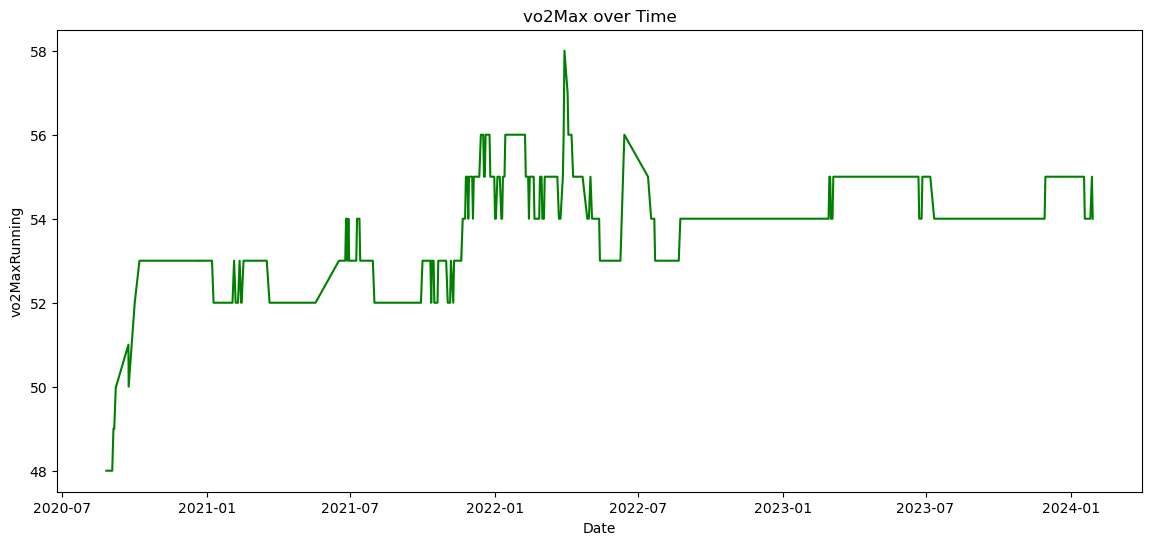

In [502]:
fig = plt.subplots(figsize=(14, 6))
plt.title('vo2Max over Time')
sns.lineplot(userBio, x=userBio['Date'], y=userBio['vo2MaxRunning'], color='green');

# Import csv file `08_2020_to_01_2024_manualExport.csv`

The last file is a manual export from Garmin's website, 'https://connect.garmin.com/.'  This will make up the bulk of the data.

In [637]:
manualExport = pd.read_csv('../data/08_2020_to_01_2024_manualExport.csv')
manualExport.head()


,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Max Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Trail Running,1/29/2024 9:11,False,Chapel Hill Trail Running,2.92,312,0:25:53,140,153,2.9,...,38,--,--,--,--,--,0:25:46,0:25:53,436,533
1,Trail Running,1/28/2024 9:52,False,Chapel Hill Trail Running,4.65,474,0:36:42,147,177,3.6,...,44,--,--,--,--,--,0:36:37,0:36:42,461,568
2,Trail Running,1/26/2024 15:17,False,Chapel Hill Trail Running,3.03,315,0:25:30,140,153,3.1,...,39,--,--,--,--,--,0:25:23,0:25:30,457,542
3,Trail Running,1/22/2024 9:31,False,Chapel Hill Trail Running,6.99,781,1:06:24,142,152,3.5,...,40,--,--,--,--,--,1:06:10,1:06:24,451,572
4,Trail Running,1/19/2024 9:49,False,Chapel Hill Trail Running,4.88,558,0:46:25,146,173,3.4,...,44,--,--,--,--,--,0:46:13,0:46:25,442,539


In [638]:
manualExport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             1028 non-null   object 
 1   Date                      1028 non-null   object 
 2   Favorite                  1028 non-null   bool   
 3   Title                     1028 non-null   object 
 4   Distance                  1028 non-null   object 
 5   Calories                  1028 non-null   object 
 6   Time                      1028 non-null   object 
 7   Avg HR                    1028 non-null   int64  
 8   Max HR                    1028 non-null   int64  
 9   Aerobic TE                1028 non-null   float64
 10  Avg Run Cadence           1028 non-null   object 
 11  Max Run Cadence           1028 non-null   object 
 12  Avg Pace                  1028 non-null   object 
 13  Best Pace                 1028 non-null   object 
 14  Total As

There are many columns here, but I suspect not all are relevant.

### Filtering for Missing Values

How many missing values are present and what do they look like.

In [639]:
manualExport_null = pd.DataFrame({'count': manualExport.isnull().sum(), '%': 100 * manualExport.isnull().mean()})
manualExport_null.sort_values('count', ascending=False)

,count,%
Total Reps,55,5.350195
Total Sets,55,5.350195
Max Stress,55,5.350195
Avg Stress,55,5.350195
Stress End,55,5.350195
Stress Start,55,5.350195
Stress Change,55,5.350195
Activity Type,0,0.000000
Max Temp,0,0.000000
Dive Time,0,0.000000


First of all, there seems to be a relationship among the first several columns all containing 55 null values.  

Second, none of the other columns have any.  They either all have usable values, or they are using a common placeholder to represent "nothing", like a zero or some other string representing nothing.  Let's take a closer look at the values.

In [640]:
manualExport.iloc[:10,:10]

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE
0,Trail Running,1/29/2024 9:11,False,Chapel Hill Trail Running,2.92,312,0:25:53,140,153,2.9
1,Trail Running,1/28/2024 9:52,False,Chapel Hill Trail Running,4.65,474,0:36:42,147,177,3.6
2,Trail Running,1/26/2024 15:17,False,Chapel Hill Trail Running,3.03,315,0:25:30,140,153,3.1
3,Trail Running,1/22/2024 9:31,False,Chapel Hill Trail Running,6.99,781,1:06:24,142,152,3.5
4,Trail Running,1/19/2024 9:49,False,Chapel Hill Trail Running,4.88,558,0:46:25,146,173,3.4
5,Trail Running,1/18/2024 8:54,False,Chapel Hill Trail Running,3.09,329,0:26:55,141,153,3.0
6,Trail Running,1/17/2024 13:24,False,Chapel Hill Trail Running,2.86,322,0:25:07,145,155,3.1
7,Running,1/13/2024 9:47,False,Prince William County Running,4.08,404,0:37:31,121,131,2.6
8,Trail Running,1/11/2024 11:00,False,Chapel Hill Trail Running,4.79,526,0:47:59,137,158,3.1
9,Trail Running,1/10/2024 8:45,False,Chapel Hill Trail Running,4.6,454,0:31:49,160,173,4.2


- `Favorite` doesn't seem necessary

In [641]:
manualExport.iloc[:10,10:20]

,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Avg Vertical Ratio,Avg Vertical Oscillation,Avg Ground Contact Time
0,157,167,8:52,7:14,252,254,1.16,0,0,0
1,160,190,7:54,5:42,344,339,1.28,0,0,0
2,157,169,8:25,6:25,226,228,1.22,0,0,0
3,156,174,9:30,6:56,637,618,1.08,0,0,0
4,158,190,9:31,6:13,475,474,1.07,0,0,0
5,157,169,8:43,7:25,241,246,1.18,0,0,0
6,158,173,8:47,6:43,260,259,1.16,0,0,0
7,157,176,9:12,6:25,174,171,1.11,0,0,0
8,152,165,10:01,8:06,354,353,1.06,0,0,0
9,167,180,6:55,6:01,330,357,1.39,0,0,0


- `Avg Vertical Ratio`, `Avg Vertical Oscillation`, and `Avg Ground Contact Time` may not be technically missing, but may be a '0' by default and not a recorded metric.

In [642]:
manualExport.iloc[:10,20:30]

,Training Stress Score®,Avg Power,Max Power,Grit,Flow,Total Strokes,Avg. Swolf,Avg Stroke Rate,Total Reps,Total Sets
0,0,0,0,0,0,--,0,0,0,--
1,0,0,0,0,0,--,0,0,0,--
2,0,0,0,0,0,--,0,0,0,--
3,0,0,0,0,0,--,0,0,0,--
4,0,0,0,0,0,--,0,0,0,--
5,0,0,0,0,0,--,0,0,0,--
6,0,0,0,0,0,--,0,0,0,--
7,0,0,0,0,0,--,0,0,0,--
8,0,0,0,0,0,--,0,0,0,--
9,0,0,0,0,0,--,0,0,0,--


All of these columns seem empty, but as I suspected, they are using a string placeholder to represent "none".  They all potentially could be dropped.

In [643]:
manualExport.iloc[:10,30:40]

,Dive Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Laps,Max Temp,Distance.1,Total Descent.1,Avg Resp
0,0:00,53.6,0:00,No,08:01.0,3,77.0,2.92,254,26
1,0:00,60.8,0:00,No,36:42.1,1,78.8,4.65,339,29
2,0:00,75.2,0:00,No,25:30.3,1,84.2,3.03,228,29
3,0:00,48.2,0:00,No,08:42.8,7,77.0,6.99,618,26
4,0:00,51.8,0:00,No,00:02.9,6,78.8,4.88,474,29
5,0:00,50.0,0:00,No,00:01.9,4,75.2,3.09,246,26
6,0:00,55.4,0:00,No,07:45.3,3,80.6,2.86,259,30
7,0:00,53.6,0:00,No,00:42.2,5,80.6,4.08,171,32
8,0:00,59.0,0:00,No,08:43.0,5,73.4,4.79,353,--
9,0:00,50.0,0:00,No,03:58.0,5,75.2,4.6,357,36


Again, `Surface Interval` is filled with'0:00' and `Decompression` is a bunch of 'No's.

In [644]:
manualExport.iloc[:10,40:]

,Min Resp,Max Resp,Stress Change,Stress Start,Stress End,Avg Stress,Max Stress,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,13,38,--,--,--,--,--,0:25:46,0:25:53,436,533
1,12,44,--,--,--,--,--,0:36:37,0:36:42,461,568
2,14,39,--,--,--,--,--,0:25:23,0:25:30,457,542
3,11,40,--,--,--,--,--,1:06:10,1:06:24,451,572
4,13,44,--,--,--,--,--,0:46:13,0:46:25,442,539
5,16,38,--,--,--,--,--,0:26:46,0:26:55,451,549
6,16,39,--,--,--,--,--,0:25:00,0:25:07,440,539
7,21,38,--,--,--,--,--,0:37:20,0:38:43,239,291
8,--,--,--,--,--,--,--,0:47:56,0:47:59,446,571
9,19,48,--,--,--,--,--,0:31:41,0:31:49,439,561


More blank fields.  Trying a different way to filter for null values.

In [645]:
# Making a list of all the "null" characters that showed up in any of the questionable columns in the snapshots of the dataframe above.
# Creating a function that returns a ratio of how often any of those characters appear in each column.
# Another list is then created of the columns in which any of the characters in the null_list appear more than 50% of the time.

null_list = [0, '0', '--', '0:00', 'No']

def null_value_ratio(column):
    value = manualExport[column].where(manualExport[column].isin(null_list)).count()/len(manualExport)
    return value

drop_list = []

for col in manualExport.columns:
    if null_value_ratio(col) > .5:
        print(f"{col}: {null_value_ratio(col):.1%}")
        drop_list.append(col)

len(drop_list)

Favorite: 99.9%
Avg Vertical Ratio: 100.0%
Avg Vertical Oscillation: 100.0%
Avg Ground Contact Time: 100.0%
Training Stress Score®: 100.0%
Avg Power: 100.0%
Max Power: 100.0%
Grit: 100.0%
Flow: 100.0%
Total Strokes: 96.3%
Avg. Swolf: 99.8%
Avg Stroke Rate: 99.8%
Total Reps: 84.3%
Total Sets: 84.2%
Dive Time: 100.0%
Surface Interval: 100.0%
Decompression: 100.0%
Stress Change: 94.6%
Stress Start: 94.6%
Stress End: 94.6%
Avg Stress: 94.6%
Max Stress: 94.6%


22

It appears 22 columns have a very high percentage of random null values, represented by 0's or '--'s.  Let's drop these columns.

In [646]:
manualExport.drop(drop_list, axis=1, inplace=True)
manualExport.shape

(1028, 29)

Down to 29 from 51.

Let's take another look at our dataframe.

In [647]:
manualExport.iloc[:15,:10]

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence
0,Trail Running,1/29/2024 9:11,Chapel Hill Trail Running,2.92,312,0:25:53,140,153,2.9,157
1,Trail Running,1/28/2024 9:52,Chapel Hill Trail Running,4.65,474,0:36:42,147,177,3.6,160
2,Trail Running,1/26/2024 15:17,Chapel Hill Trail Running,3.03,315,0:25:30,140,153,3.1,157
3,Trail Running,1/22/2024 9:31,Chapel Hill Trail Running,6.99,781,1:06:24,142,152,3.5,156
4,Trail Running,1/19/2024 9:49,Chapel Hill Trail Running,4.88,558,0:46:25,146,173,3.4,158
5,Trail Running,1/18/2024 8:54,Chapel Hill Trail Running,3.09,329,0:26:55,141,153,3.0,157
6,Trail Running,1/17/2024 13:24,Chapel Hill Trail Running,2.86,322,0:25:07,145,155,3.1,158
7,Running,1/13/2024 9:47,Prince William County Running,4.08,404,0:37:31,121,131,2.6,157
8,Trail Running,1/11/2024 11:00,Chapel Hill Trail Running,4.79,526,0:47:59,137,158,3.1,152
9,Trail Running,1/10/2024 8:45,Chapel Hill Trail Running,4.6,454,0:31:49,160,173,4.2,167


In [648]:
manualExport.iloc[:15,10:20]

,Max Run Cadence,Avg Pace,Best Pace,Total Ascent,Total Descent,Avg Stride Length,Min Temp,Best Lap Time,Number of Laps,Max Temp
0,167,8:52,7:14,252,254,1.16,53.6,08:01.0,3,77.0
1,190,7:54,5:42,344,339,1.28,60.8,36:42.1,1,78.8
2,169,8:25,6:25,226,228,1.22,75.2,25:30.3,1,84.2
3,174,9:30,6:56,637,618,1.08,48.2,08:42.8,7,77.0
4,190,9:31,6:13,475,474,1.07,51.8,00:02.9,6,78.8
5,169,8:43,7:25,241,246,1.18,50.0,00:01.9,4,75.2
6,173,8:47,6:43,260,259,1.16,55.4,07:45.3,3,80.6
7,176,9:12,6:25,174,171,1.11,53.6,00:42.2,5,80.6
8,165,10:01,8:06,354,353,1.06,59.0,08:43.0,5,73.4
9,180,6:55,6:01,330,357,1.39,50.0,03:58.0,5,75.2


In [649]:
manualExport.iloc[:15,20:]

,Distance.1,Total Descent.1,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,2.92,254,26,13,38,0:25:46,0:25:53,436,533
1,4.65,339,29,12,44,0:36:37,0:36:42,461,568
2,3.03,228,29,14,39,0:25:23,0:25:30,457,542
3,6.99,618,26,11,40,1:06:10,1:06:24,451,572
4,4.88,474,29,13,44,0:46:13,0:46:25,442,539
5,3.09,246,26,16,38,0:26:46,0:26:55,451,549
6,2.86,259,30,16,39,0:25:00,0:25:07,440,539
7,4.08,171,32,21,38,0:37:20,0:38:43,239,291
8,4.79,353,--,--,--,0:47:56,0:47:59,446,571
9,4.6,357,36,19,48,0:31:41,0:31:49,439,561


Are the columns appended with ".1" necessary?

In [651]:
manualExport_distance_numeric = manualExport.Distance.apply(pd.to_numeric, errors='coerce')
manualExport_distance1_numeric = manualExport['Distance.1'].apply(pd.to_numeric, errors='coerce')
manualExport_TotalDescent_numeric = manualExport['Total Descent'].apply(pd.to_numeric, errors='coerce')
manualExport_TotalDescent1_numeric = manualExport['Total Descent.1'].apply(pd.to_numeric, errors='coerce')

print(manualExport_distance_numeric.isna().value_counts())
print(manualExport_distance1_numeric.isna().value_counts())
print(manualExport_TotalDescent_numeric.isna().value_counts())
print(manualExport_TotalDescent1_numeric.isna().value_counts())

print(sum(manualExport_distance_numeric - manualExport_distance1_numeric))
print(sum(manualExport_TotalDescent_numeric - manualExport_TotalDescent1_numeric))


False    991
True      37
Name: Distance, dtype: int64
False    991
True      37
Name: Distance.1, dtype: int64
False    852
True     176
Name: Total Descent, dtype: int64
False    852
True     176
Name: Total Descent.1, dtype: int64
nan
nan


Looks like there's no difference between `Distance` and `Distance.1` and `Total Descent` and `Total Descent.1`.  Let's drop the columns with the trailing '.1'.

In [652]:
manualExport.drop(['Distance.1','Total Descent.1'], axis=1, inplace=True)

In [653]:
manualExport.dtypes.value_counts()

object     20
float64     4
int64       3
dtype: int64

Looks like a good number of columns are still 'object' data types.  This may be a problem when visualizing the data.

Let's convert the obvious numeric columns to a numeric datatype, excluding the 'time-based' columns.

In [655]:
manualExport.columns

Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence',
       'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent',
       'Avg Stride Length', 'Min Temp', 'Best Lap Time', 'Number of Laps',
       'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time',
       'Elapsed Time', 'Min Elevation', 'Max Elevation'],
      dtype='object')

In [656]:
exclude = ['Activity Type','Date','Title','Time','Avg Pace','Best Pace','Best Lap Time','Moving Time','Elapsed Time']
for col in manualExport.columns:
    if manualExport[col].dtype == 'object' and col not in exclude:
        manualExport[col] = pd.to_numeric(manualExport[col], errors='coerce')
print(manualExport.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity Type      1028 non-null   object 
 1   Date               1028 non-null   object 
 2   Title              1028 non-null   object 
 3   Distance           991 non-null    float64
 4   Calories           991 non-null    float64
 5   Time               1028 non-null   object 
 6   Avg HR             1028 non-null   int64  
 7   Max HR             1028 non-null   int64  
 8   Aerobic TE         1028 non-null   float64
 9   Avg Run Cadence    858 non-null    float64
 10  Max Run Cadence    858 non-null    float64
 11  Avg Pace           1028 non-null   object 
 12  Best Pace          1028 non-null   object 
 13  Total Ascent       850 non-null    float64
 14  Total Descent      852 non-null    float64
 15  Avg Stride Length  1028 non-null   float64
 16  Min Temp           1028 

That worked!  We can now gain insight into much of the numeric based information.  However, there are still a good deal of null values.

In [661]:
manualExport_missing = pd.DataFrame({'count': manualExport.isnull().sum(), '%': 100 * manualExport.isnull().mean()})
manualExport_missing[manualExport_missing['count'] != 0].sort_values('count', ascending=False)

,count,%
Min Elevation,179,17.412451
Max Elevation,179,17.412451
Total Ascent,178,17.315175
Total Descent,176,17.120623
Avg Run Cadence,170,16.536965
Max Run Cadence,170,16.536965
Avg Resp,47,4.571984
Min Resp,47,4.571984
Max Resp,47,4.571984
Distance,37,3.599222


There also seems to be a pattern among the missing values in some of the columns.  Let's take a deeper look into this in EDA.

### Distribution of Numeric Columns

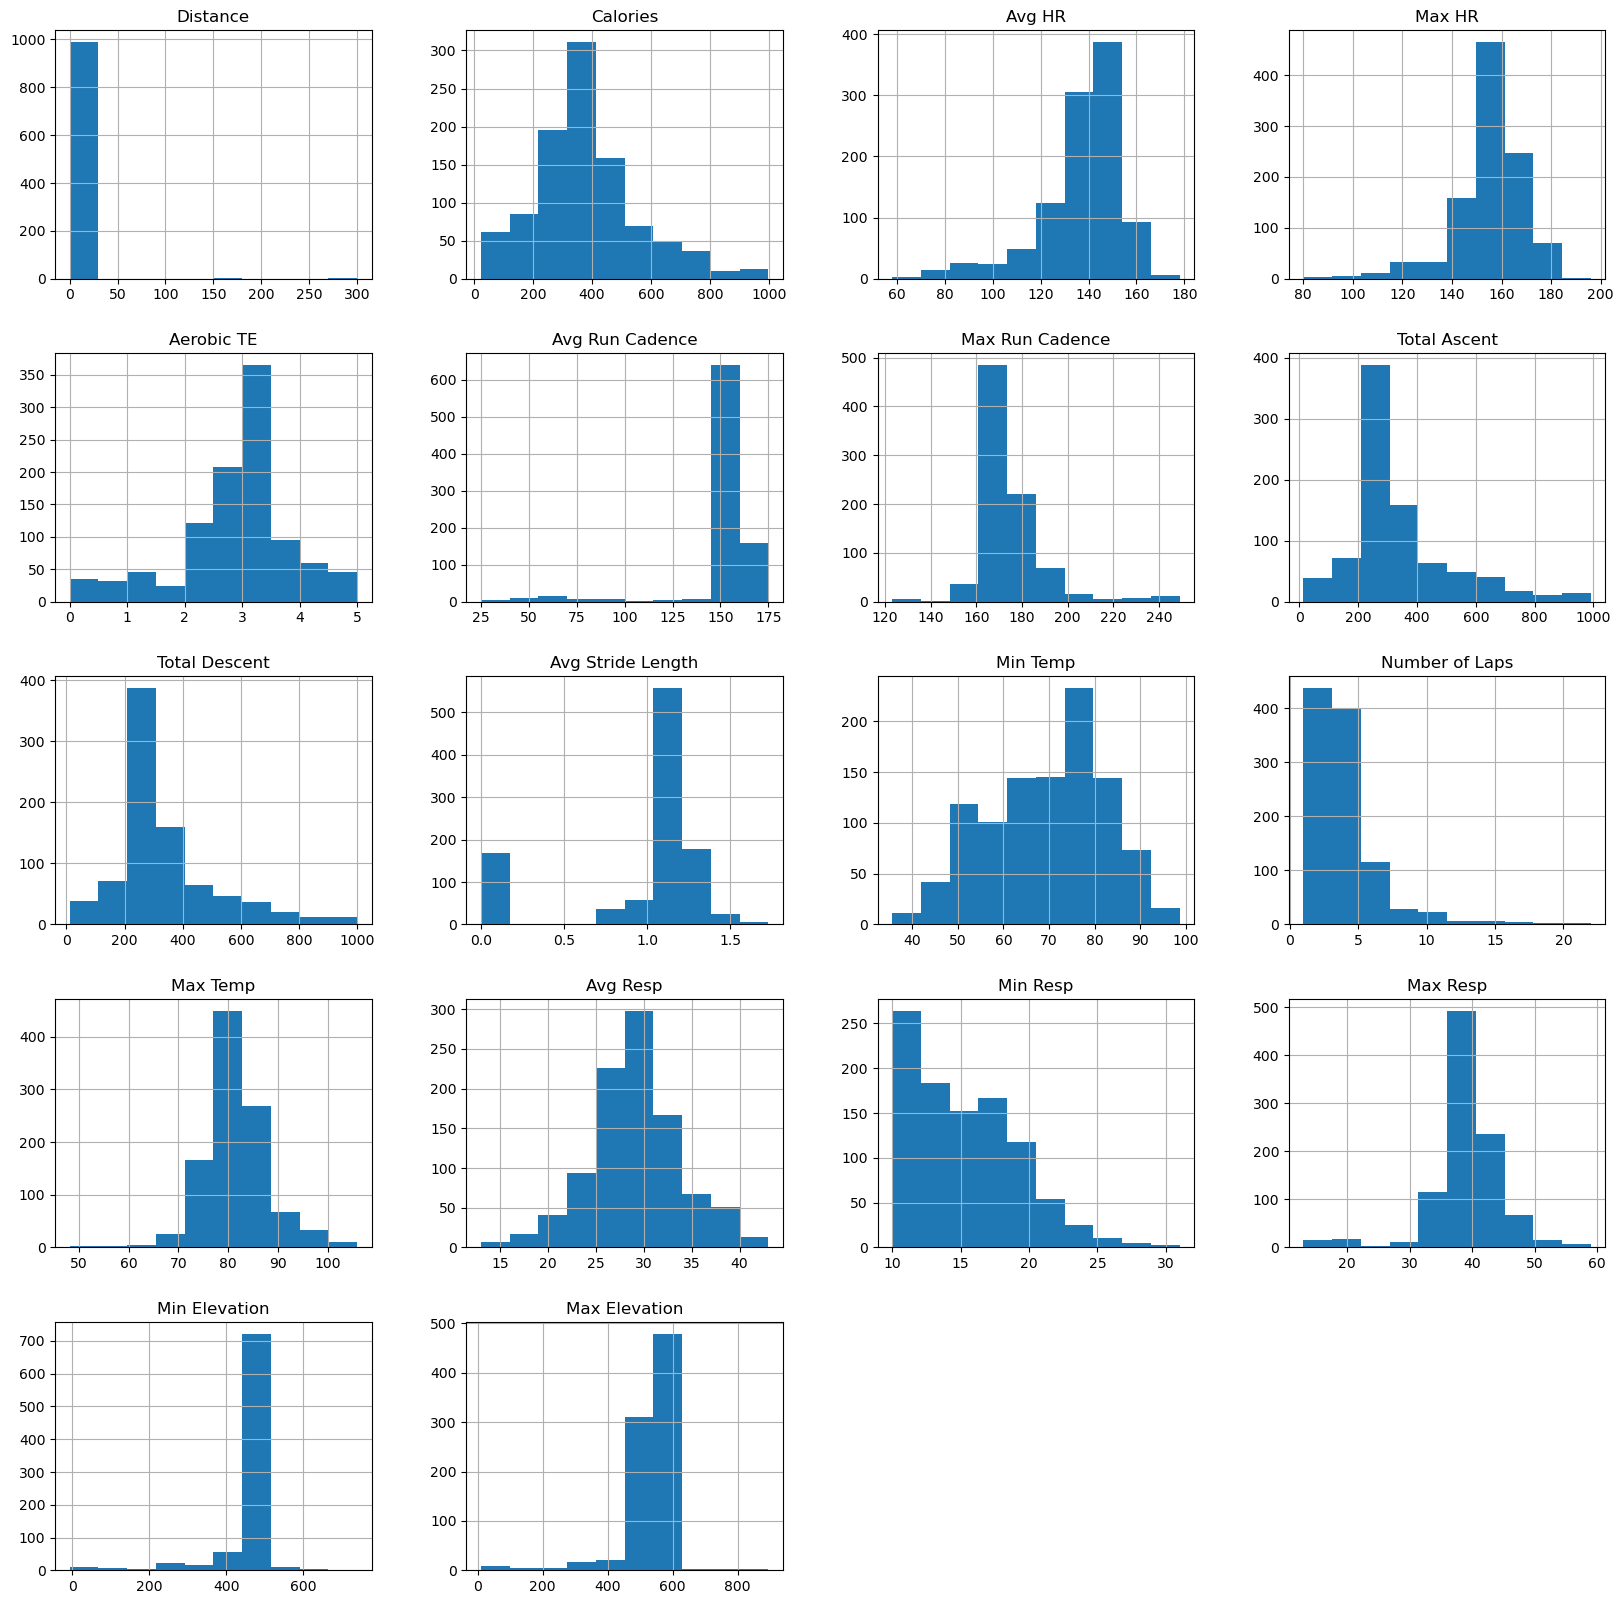

In [660]:
manualExport.hist(figsize=(20,20));


  Let's take a closer look during EDA.

Questionable areas:
- Some distributions have just a handful of data on the low end.
- `Distance`: there should not be values over 10-15 miles.
- Time-based columns still need to be investigated.

# Final Thoughts

Among the four JSON files available, two contained our target feature, Aerobic Training Effect.

**"marcmehrotra@gmail.com_0_summarizedActivities.json" and "marcmehrotra@gmail.com_1001_summarizedActivities.json"**
- This first pair of files included our target feature, in addition to many other features which may either be useful information or at the very least, helpful in joining the datasets together in the next step.  Some columns were not relevant and were dropped.  After taking a closer look at the distributions of the numerical features, some recorded activities were found to be inaccurate and also dropped.


**"88467128_userBioMetrics.json"**
- The third file had quite a bit of data, but much of it was not relevant.  However, there was a date column associated with a couple key features which may be useful in combining this data with the other datasets, and bringing order to the first two files which did not have a date.  Only those few columns were kept.

**"08_2020_to_01_2024_manualExport.csv"**
- The fourth file contained a great deal of information, however, many of the columns contained missing information. Columns with a high percentage of missing values were dropped.  Many of the numerical columns were originally recorded as strings, so they were reformatted to their appropriate numerical data type.  Further work is needed to determine the validity of some of the data on the very low end of the spectrum.  Distributions on Time-based columns need to be investigated.

There are still many missing values which need to be addressed when a deeper look into the data is taken during EDA.  Exploring the relationship between different metrics will hopefully shed some light on the reason for some of the missing values, and whether or not more columns and activitites need to be removed.